<a href="https://colab.research.google.com/github/kyjness/Undergraduate-Research-Assistant/blob/main/5%EC%A3%BC%EC%B0%A8_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC_%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#07. 딥 러닝(Deep Learning) 개요

##07-01 퍼셉트론(Perceptron)

###2. 단층 퍼셉트론(Single-Layer Perceptron)

In [ ]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [ ]:
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [ ]:
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

##07-02 인공 신경망(Artificial Neural Network) 훑어보기

###3. 활성화 함수(Activation Function)

(1) 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(2) 계단 함수(Step function)

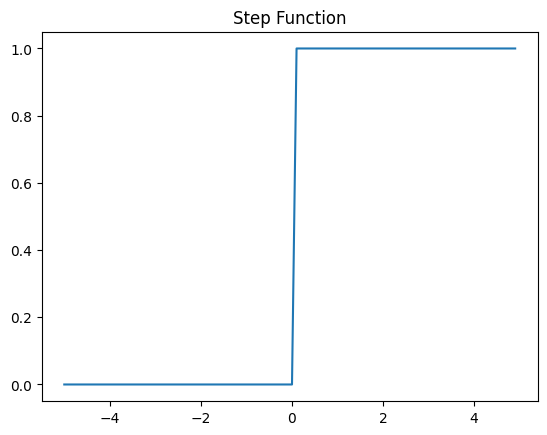

In [ ]:
def step(x):
    return np.array(x > 0, dtype=int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

(3) 시그모이드 함수(Sigmoid function)와 기울기 소실

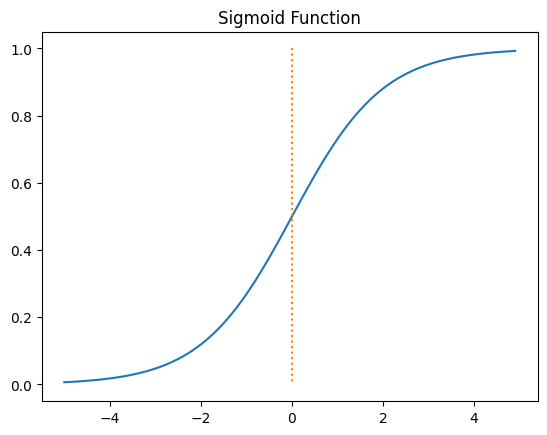

In [ ]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

(4) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

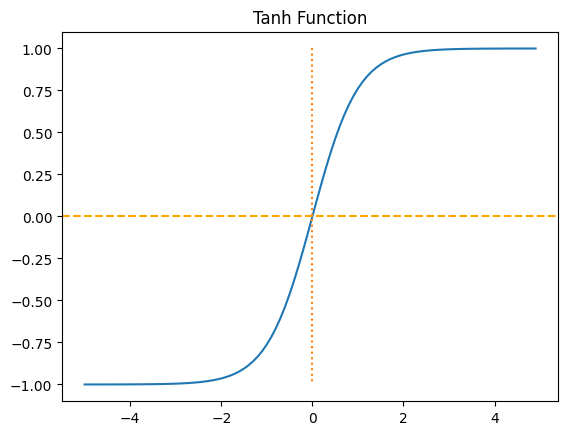

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

(5) 렐루 함수(ReLU)

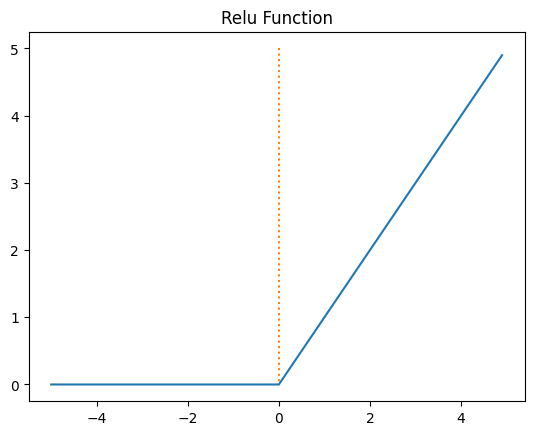

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

(6) 리키 렐루(Leaky ReLU)

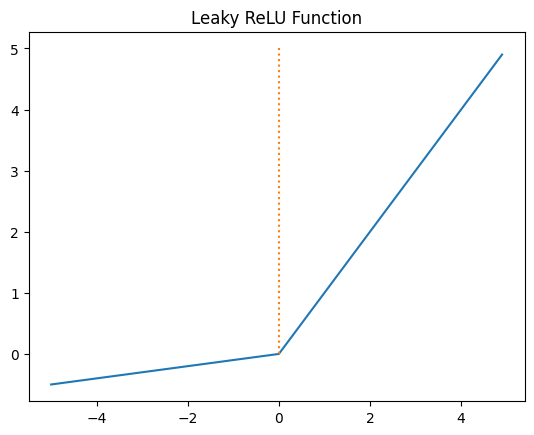

In [ ]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

(7) 소프트맥스 함수(Softmax function)

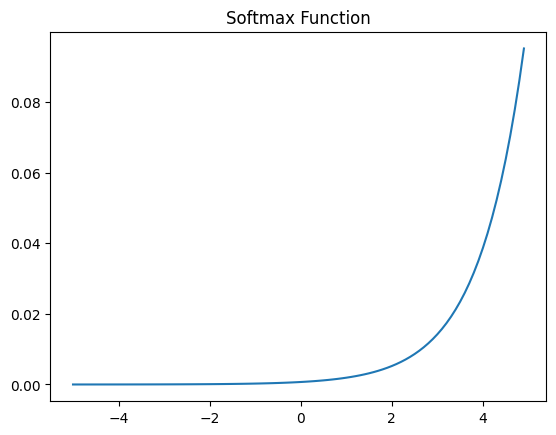

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

##07-03 행렬곱으로 이해하는 신경망

###2. 행렬곱으로 순전파 이해하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

###4. 행렬곱으로 다층 퍼셉트론의 순전파 이해하기

1) 코드로 구현하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))

##07-04 딥 러닝의 학습 방법

###1. 손실 함수(Loss function)

1) MSE(Mean Squared Error, MSE)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

2) 이진 크로스 엔트로피(Binary Cross-Entropy)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

3) 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

##07-05 역전파(BackPropagation) 이해하기

##07-06 과적합(Overfitting)을 막는 방법들

###4. 드롭아웃(Dropout)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))

##07-07 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

##07-08 케라스(Keras) 훑어보기

###1. 전처리(Preprocessing)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [ ]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

###2. 워드 임베딩(Word Embedding)

In [39]:
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding_1, built=False>

###3. 모델링(Modeling)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [44]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

In [46]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

###4. 컴파일(Compile)과 훈련(Training)

In [35]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

In [ ]:
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

###5. 평가(Evaluation)와 예측(Prediction)

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.evaluate(X_test, y_test, batch_size=32)

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)

###6. 모델의 저장(Save)과 로드(Load)

In [ ]:
#save() : 인공 신경망 모델을 hdf5 파일에 저장합니다.
model.save("model_name.h5")

In [ ]:
#load_model() : 저장해둔 모델을 불러옵니다.
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")

##07-09 케라스의 함수형 API(Keras Functional API)

###1. Sequential API로 만든 모델

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

###2. Functional API로 만든 모델

1) 전결합 피드 포워드 신경망(Fully-connected FFNN)

In [49]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [50]:
inputs = Input(shape=(10,))

In [51]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)  # <- 새로 추가
hidden2 = Dense(64, activation='relu')(hidden1) # <- 새로 추가
output = Dense(1, activation='sigmoid')(hidden2) # <- 새로 추가

In [52]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output) # <- 새로 추가

In [53]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(data, labels)

In [54]:
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

2) 선형 회귀(Linear Regression)

In [59]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

X = np.array(X)
y = np.array(y)

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(learning_rate=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - loss: 4523.8271 - mse: 4523.8271
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 557.7532 - mse: 557.7532
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 69.7556 - mse: 69.7556
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.7096 - mse: 9.7096
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.3198 - mse: 2.3198
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.4090 - mse: 1.4090
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.2953 - mse: 1.2953
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.2797 - mse: 1.2797
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.2762 - mse: 1.2762
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.2743 - mse: 1.2743
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.2725 - mse: 1.2725
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.2707 - mse: 1.2707
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━

3) 로지스틱 회귀(Logistic Regression)

In [56]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

4) 다중 입력을 받는 모델(model that accepts multiple inputs)

In [61]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

5) RNN(Recurrence Neural Network) 은닉층 사용하기

In [62]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

##07-10 케라스 서브클래싱 API(Keras Subclassing API)

###1. 서브클래싱 API로 구현한 선형 회귀

In [63]:
import tensorflow as tf

In [64]:
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

In [65]:
model = LinearRegression()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

X = np.array(X)
y = np.array(y)
X = X.reshape(-1, 1)

In [73]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step - loss: 3856.9626 - mse: 3856.9626
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 475.6495 - mse: 475.6495
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 59.6032 - mse: 59.6032
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.4106 - mse: 8.4106
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.1105 - mse: 2.1105
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.3341 - mse: 1.3341
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2374 - mse: 1.2374
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2243 - mse: 1.2243
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2216 - mse: 1.2216
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.2201 - mse: 1.2201
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.2187 - mse: 1.2187
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.2174 - mse: 1.2174
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━

##07-11 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기

###2. 케라스의 texts_to_matrix() 이해하기

In [74]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [75]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [76]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [77]:
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [78]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [79]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [80]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


###3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [81]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [82]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

In [83]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [84]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [85]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [86]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [87]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [88]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [89]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [91]:
data.isnull().values.any()

False

In [92]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


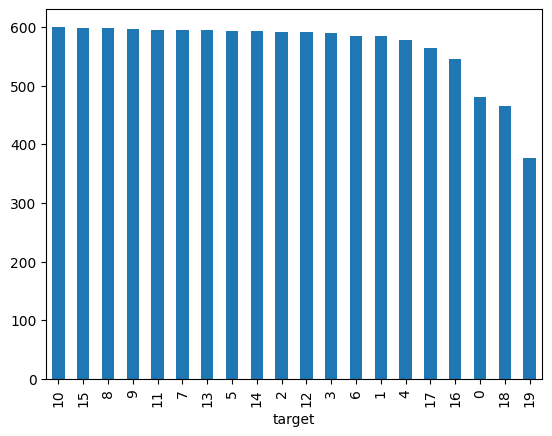

In [93]:
data['target'].value_counts().plot(kind='bar');

In [94]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [95]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [96]:
vocab_size = 10000
num_classes = 20

In [97]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [98]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [99]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [100]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


###4. 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [102]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [103]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.1930 - loss: 2.7021 - val_accuracy: 0.8216 - val_loss: 0.9881
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.7167 - loss: 1.0267 - val_accuracy: 0.8790 - val_loss: 0.4795
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8789 - loss: 0.4687 - val_accuracy: 0.9046 - val_loss: 0.3608
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9352 - loss: 0.2707 - val_accuracy: 0.9117 - val_loss: 0.3154
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9600 - loss: 0.1679 - val_accuracy: 0.9117 - val_loss: 0.3047
binary 모드의 테스트 정확도: 0.8256770968437195
Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.1390 - loss: 3.2746 - val_accuracy: 0.7394 - val_loss: 1.6617
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.5766 - loss: 1.6345 - val_accuracy: 0.8472 - val_loss: 0.7352
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7832 - loss: 0.

##07-12 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)

#08. 순환 신경망(Recurrent Neural Network)

###2. 케라스(Keras)로 RNN 구현하기

In [106]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(hidden_units))

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 3)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10)))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 3)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [113]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10), return_sequences=True))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 2, 3)                │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

###3. 파이썬으로 RNN 구현하기

In [112]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,))

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [114]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [115]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

  # Wx * Xt + Wh * Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0)

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.94615471 0.88661245 0.93903416 0.87980041 0.81740513 0.98258759
  0.94202147 0.9410485 ]
 [0.99851032 0.99986513 0.99998322 0.99991057 0.99948672 0.9999696
  0.99994481 0.99998922]
 [0.99891472 0.99997268 0.99999725 0.99998859 0.99986188 0.99999699
  0.99997593 0.99999627]
 [0.99844065 0.99990697 0.99999335 0.9999694  0.99984733 0.99998888
  0.99997308 0.99999591]
 [0.99814744 0.99996312 0.99999077 0.99998554 0.99978825 0.99998833
  0.999951   0.99998997]
 [0.99957528 0.99994372 0.99999799 0.99997122 0.99986174 0.99999593
  0.99999006 0.99999855]
 [0.99893394 0.99993767 0.9999961  0.99997534 0.99985531 0.99999388
  0.99997969 0.99999696]
 [0.99894535 0.99996549 0.99999603 0.99997653 0.99978377 0.99999426
  0.99997498 0.99999524]
 [0.99785626 0.99995329 0.99999102 0.99998577 0.99982753 0.9999891
  0.99995229 0.99999145]
 [0.99874554 0.99986161 0.99999295 0.99994238 0.99982145 0.9999842
  0.99997892 0.99999668]]


###4. 깊은 순환 신경망(Deep Recurrent Neural Network)

In [124]:
from tensorflow import keras
from keras.layers import SimpleRNN, Input
from keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(hidden_units, return_sequences=True, input_shape=input_shape))
model.add(SimpleRNN(hidden_units, return_sequences=True))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

In [117]:
from tensorflow.keras.layers import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##08-01 순환 신경망(Recurrent Neural Network, RNN)

##08-02 장단기 메모리(Long Short-Term Memory, LSTM)

##08-03 게이트 순환 유닛(Gated Recurrent Unit, GRU)

##08-04 케라스의 SimpleRNN과 LSTM 이해하기

###1. 임의의 입력 생성하기

In [119]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [120]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


In [125]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


###2. SimpleRNN 이해하기

In [126]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.5515582   0.77154666  0.78231865]], shape: (1, 3)


In [127]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.9947726   0.9848989  -0.03130474]
  [-0.9458587   0.9272655  -0.9854051 ]
  [-0.92701435  0.08061756 -0.8785872 ]
  [-0.98645604  0.95369375 -0.9295383 ]]], shape: (1, 4, 3)


In [128]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.62605155  0.22514257  0.34661782]
  [ 0.9157453  -0.5770261   0.8539775 ]
  [ 0.90702516 -0.5719995   0.80681217]
  [ 0.8873227   0.9302789  -0.01249594]]], shape: (1, 4, 3)
last hidden state : [[ 0.8873227   0.9302789  -0.01249594]], shape: (1, 3)


In [129]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.19378763  0.9979114  -0.9306287 ]], shape: (1, 3)
last hidden state : [[-0.19378763  0.9979114  -0.9306287 ]], shape: (1, 3)


###3. LSTM 이해하기

In [130]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.5765226  -0.16505536 -0.22035396]], shape: (1, 3)
last hidden state : [[-0.5765226  -0.16505536 -0.22035396]], shape: (1, 3)
last cell state : [[-0.8500245  -0.24185535 -0.6045533 ]], shape: (1, 3)


In [131]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.35895804 -0.47300944  0.01545289]
  [-0.23557204 -0.5037645   0.16688885]
  [-0.42085642 -0.4634269   0.25118482]
  [-0.17592709 -0.59877986  0.14815867]]], shape: (1, 4, 3)
last hidden state : [[-0.17592709 -0.59877986  0.14815867]], shape: (1, 3)
last cell state : [[-2.0370276 -1.060389   0.2978538]], shape: (1, 3)


###4. Bidirectional(LSTM) 이해하기

In [132]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [133]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


In [134]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [135]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


##08-05 RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)

##08-06 RNN을 이용한 텍스트 생성(Text Generation using RNN)

###1. RNN을 이용하여 텍스트 생성하기

1) 데이터에 대한 이해와 전처리

In [136]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [138]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [139]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [140]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [141]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [142]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [143]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [144]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [145]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [146]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [147]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [148]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


In [149]:
y = to_categorical(y, num_classes=vocab_size)

In [150]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


2) 모델 설계하기

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [152]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 4s - 4s/step - accuracy: 0.0909 - loss: 2.4872
Epoch 2/200
1/1 - 0s - 27ms/step - accuracy: 0.0909 - loss: 2.4716
Epoch 3/200
1/1 - 0s - 25ms/step - accuracy: 0.2727 - loss: 2.4562
Epoch 4/200
1/1 - 0s - 25ms/step - accuracy: 0.4545 - loss: 2.4410
Epoch 5/200
1/1 - 0s - 25ms/step - accuracy: 0.3636 - loss: 2.4258
Epoch 6/200
1/1 - 0s - 26ms/step - accuracy: 0.4545 - loss: 2.4105
Epoch 7/200
1/1 - 0s - 26ms/step - accuracy: 0.3636 - loss: 2.3949
Epoch 8/200
1/1 - 0s - 25ms/step - accuracy: 0.3636 - loss: 2.3789
Epoch 9/200
1/1 - 0s - 27ms/step - accuracy: 0.3636 - loss: 2.3623
Epoch 10/200
1/1 - 0s - 58ms/step - accuracy: 0.3636 - loss: 2.3451
Epoch 11/200
1/1 - 0s - 27ms/step - accuracy: 0.3636 - loss: 2.3271
Epoch 12/200
1/1 - 0s - 25ms/step - accuracy: 0.3636 - loss: 2.3083
Epoch 13/200
1/1 - 0s - 25ms/step - accuracy: 0.3636 - loss: 2.2885
Epoch 14/200
1/1 - 0s - 58ms/step - accuracy: 0.3636 - loss: 2.2677
Epoch 15/200
1/1 - 0s - 56ms/step - accuracy: 0.3636 - loss

In [153]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items():
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [154]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [155]:
print(sentence_generation(model, tokenizer, '그의', 2))

그의 말이 법이다


In [156]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


###2. LSTM을 이용하여 텍스트 생성하기

1) 데이터에 대한 이해와 전처리

In [157]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [194]:
df = pd.read_csv('/content/drive/MyDrive/학부연구생/article/ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [195]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [196]:
print(df['headline'].isnull().values.any())

False


In [197]:
headline = []
# 헤드라인의 값들을 리스트로 저장
headline.extend(list(df.headline.values))
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [198]:
print('총 샘플의 개수 : {}'.format(len(headline)))

총 샘플의 개수 : 1324


In [199]:
headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

노이즈값 제거 후 샘플의 개수 : 1214


In [200]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [201]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()

preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [202]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [203]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [204]:
index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : offer


In [205]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [206]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [207]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [208]:
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [209]:
print(y[:3])

[ 269  371 1115]


In [210]:
y = to_categorical(y, num_classes=vocab_size)

2) 모델 설계하기

In [211]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [212]:
embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 13s - 55ms/step - accuracy: 0.0293 - loss: 7.6469
Epoch 2/200
244/244 - 17s - 68ms/step - accuracy: 0.0287 - loss: 7.1257
Epoch 3/200
244/244 - 12s - 50ms/step - accuracy: 0.0318 - loss: 6.9930
Epoch 4/200
244/244 - 9s - 36ms/step - accuracy: 0.0396 - loss: 6.8669
Epoch 5/200
244/244 - 11s - 45ms/step - accuracy: 0.0438 - loss: 6.7222
Epoch 6/200
244/244 - 9s - 38ms/step - accuracy: 0.0463 - loss: 6.5540
Epoch 7/200
244/244 - 11s - 44ms/step - accuracy: 0.0493 - loss: 6.3657
Epoch 8/200
244/244 - 7s - 29ms/step - accuracy: 0.0546 - loss: 6.1756
Epoch 9/200
244/244 - 11s - 47ms/step - accuracy: 0.0597 - loss: 5.9834
Epoch 10/200
244/244 - 9s - 39ms/step - accuracy: 0.0664 - loss: 5.7944
Epoch 11/200
244/244 - 8s - 33ms/step - accuracy: 0.0689 - loss: 5.6147
Epoch 12/200
244/244 - 9s - 38ms/step - accuracy: 0.0730 - loss: 5.4492
Epoch 13/200
244/244 - 7s - 29ms/step - accuracy: 0.0788 - loss: 5.2865
Epoch 14/200
244/244 - 9s - 38ms/step - accuracy: 0.0818 - loss: 5.

In [213]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items():
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [214]:
print(sentence_generation(model, tokenizer, 'i', 10))

i want to be rich and im not sorry dogs case


In [215]:
print(sentence_generation(model, tokenizer, 'how', 10))

how to make a crossword puzzle gap now fire have 14


##08-07 문자 단위 RNN(Char RNN)

###1. 문자 단위 RNN 언어 모델(Char RNNLM)

1) 데이터에 대한 이해와 전처리

In [159]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

# 데이터 로드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽는다.
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거한다.
    sentence = sentence.lower() # 소문자화.
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [160]:
sentences[:5]

["*** start of the project gutenberg ebook alice's adventures in",
 'wonderland ***',
 '[illustration]',
 'alices adventures in wonderland',
 'by lewis carroll']

In [161]:
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d' % len(total_data))

문자열의 길이 또는 총 문자의 개수: 140323


In [162]:
print(total_data[:200])

*** start of the project gutenberg ebook alice's adventures in wonderland *** [illustration] alices adventures in wonderland by lewis carroll the millennium fulcrum edition 3.0 contents chapter i.    


In [163]:
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 43


In [164]:
# 문자에 고유한 정수 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print('문자 집합 :',char_to_index)

문자 집합 : {' ': 0, '!': 1, "'": 2, '(': 3, ')': 4, '*': 5, ',': 6, '-': 7, '.': 8, '0': 9, '3': 10, ':': 11, ';': 12, '?': 13, '[': 14, ']': 15, '_': 16, 'a': 17, 'b': 18, 'c': 19, 'd': 20, 'e': 21, 'f': 22, 'g': 23, 'h': 24, 'i': 25, 'j': 26, 'k': 27, 'l': 28, 'm': 29, 'n': 30, 'o': 31, 'p': 32, 'q': 33, 'r': 34, 's': 35, 't': 36, 'u': 37, 'v': 38, 'w': 39, 'x': 40, 'y': 41, 'z': 42}


In [165]:
index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [166]:
# appl (입력 시퀀스) -> pple (예측해야하는 시퀀스)
train_X = 'appl'
train_y = 'pple'

In [167]:
seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
n_samples = int(np.floor((len(total_data) - 1) / seq_length))
print ('샘플의 수 : {}'.format(n_samples))

샘플의 수 : 2338


In [168]:
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick.
    X_sample = total_data[i * seq_length: (i + 1) * seq_length]

    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)

    # 오른쪽으로 1칸 쉬프트
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [169]:
print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])

X 데이터의 첫번째 샘플 : [5, 5, 5, 0, 35, 36, 17, 34, 36, 0, 31, 22, 0, 36, 24, 21, 0, 32, 34, 31, 26, 21, 19, 36, 0, 23, 37, 36, 21, 30, 18, 21, 34, 23, 0, 21, 18, 31, 31, 27, 0, 17, 28, 25, 19, 21, 2, 35, 0, 17, 20, 38, 21, 30, 36, 37, 34, 21, 35, 0]
y 데이터의 첫번째 샘플 : [5, 5, 0, 35, 36, 17, 34, 36, 0, 31, 22, 0, 36, 24, 21, 0, 32, 34, 31, 26, 21, 19, 36, 0, 23, 37, 36, 21, 30, 18, 21, 34, 23, 0, 21, 18, 31, 31, 27, 0, 17, 28, 25, 19, 21, 2, 35, 0, 17, 20, 38, 21, 30, 36, 37, 34, 21, 35, 0, 25]
--------------------------------------------------
X 데이터의 첫번째 샘플 디코딩 : ['*', '*', '*', ' ', 's', 't', 'a', 'r', 't', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'a', 'l', 'i', 'c', 'e', "'", 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ']
y 데이터의 첫번째 샘플 디코딩 : ['*', '*', ' ', 's', 't', 'a', 'r', 't', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' '

In [170]:
print(train_X[1])

[25, 30, 0, 39, 31, 30, 20, 21, 34, 28, 17, 30, 20, 0, 5, 5, 5, 0, 14, 25, 28, 28, 37, 35, 36, 34, 17, 36, 25, 31, 30, 15, 0, 17, 28, 25, 19, 21, 35, 0, 17, 20, 38, 21, 30, 36, 37, 34, 21, 35, 0, 25, 30, 0, 39, 31, 30, 20, 21, 34]


In [171]:
print(train_y[1])

[30, 0, 39, 31, 30, 20, 21, 34, 28, 17, 30, 20, 0, 5, 5, 5, 0, 14, 25, 28, 28, 37, 35, 36, 34, 17, 36, 25, 31, 30, 15, 0, 17, 28, 25, 19, 21, 35, 0, 17, 20, 38, 21, 30, 36, 37, 34, 21, 35, 0, 25, 30, 0, 39, 31, 30, 20, 21, 34, 28]


In [172]:
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2338, 60, 43)
train_y의 크기(shape) : (2338, 60, 43)


2) 모델 설계하기

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

hidden_units = 256

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

Epoch 1/80
74/74 - 57s - 775ms/step - accuracy: 0.1869 - loss: 3.0347
Epoch 2/80
74/74 - 81s - 1s/step - accuracy: 0.2572 - loss: 2.6934
Epoch 3/80
74/74 - 67s - 908ms/step - accuracy: 0.3383 - loss: 2.3440
Epoch 4/80
74/74 - 36s - 484ms/step - accuracy: 0.3735 - loss: 2.1970
Epoch 5/80
74/74 - 40s - 539ms/step - accuracy: 0.4023 - loss: 2.0845
Epoch 6/80
74/74 - 40s - 536ms/step - accuracy: 0.4212 - loss: 1.9995
Epoch 7/80
74/74 - 39s - 521ms/step - accuracy: 0.4395 - loss: 1.9289
Epoch 8/80
74/74 - 36s - 491ms/step - accuracy: 0.4538 - loss: 1.8735
Epoch 9/80
74/74 - 37s - 497ms/step - accuracy: 0.4676 - loss: 1.8203
Epoch 10/80
74/74 - 39s - 527ms/step - accuracy: 0.4807 - loss: 1.7752
Epoch 11/80
74/74 - 34s - 454ms/step - accuracy: 0.4930 - loss: 1.7299
Epoch 12/80
74/74 - 35s - 470ms/step - accuracy: 0.5039 - loss: 1.6887
Epoch 13/80
74/74 - 42s - 573ms/step - accuracy: 0.5154 - loss: 1.6487
Epoch 14/80
74/74 - 39s - 525ms/step - accuracy: 0.5248 - loss: 1.6127
Epoch 15/80
74/74 

In [174]:
def sentence_generation(model, length):
    # 문자에 대한 랜덤한 정수 생성
    ix = [np.random.randint(vocab_size)]

    # 랜덤한 정수로부터 맵핑되는 문자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1],'번 문자',y_char[-1],'로 예측을 시작!')

    # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))

    for i in range(length):
        # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [175]:
result = sentence_generation(model, 100)
print(result)

35 번 문자 s 로 예측을 시작!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

###2. 문자 단위 RNN(Char RNN)으로 텍스트 생성하기

1) 데이터에 대한 이해와 전처리

In [176]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [177]:
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [179]:
#위의 텍스트에 존재하는 단락 구분을 없애고 하나의 문자열로 재저장하겠습니다.

tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [180]:
# 중복을 제거한 문자 집합 생성
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print('문자 집합 :',char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합 : [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기 : 33


In [181]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [182]:
length = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))

총 훈련 샘플의 수: 426


In [183]:
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [184]:
encoded_sequences = []
for sequence in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    encoded_sequence = [char_to_index[char] for char in sequence] # 문장 샘플에서 각 문자에 대해서 정수 인코딩을 수행.
    encoded_sequences.append(encoded_sequence)

In [185]:
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

In [186]:
encoded_sequences = np.array(encoded_sequences)

# 맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]
# 맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]

In [187]:
print(X_data[:5])
print(y_data[:5])

[[ 8  0 16 14 28  0 24 23  0 31]
 [ 0 16 14 28  0 24 23  0 31 18]
 [16 14 28  0 24 23  0 31 18 28]
 [14 28  0 24 23  0 31 18 28 17]
 [28  0 24 23  0 31 18 28 17  0]]
[18 28 17  0 21]


In [188]:
# 원-핫 인코딩
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

In [189]:
print(X_data_one_hot.shape)

(426, 10, 33)


2) 모델 설계하기

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 - 2s - 178ms/step - accuracy: 0.1103 - loss: 3.4745
Epoch 2/100
14/14 - 0s - 10ms/step - accuracy: 0.1972 - loss: 3.3832
Epoch 3/100
14/14 - 0s - 7ms/step - accuracy: 0.1972 - loss: 3.1477
Epoch 4/100
14/14 - 0s - 10ms/step - accuracy: 0.1972 - loss: 2.9964
Epoch 5/100
14/14 - 0s - 10ms/step - accuracy: 0.1972 - loss: 2.9611
Epoch 6/100
14/14 - 0s - 9ms/step - accuracy: 0.1972 - loss: 2.9418
Epoch 7/100
14/14 - 0s - 10ms/step - accuracy: 0.1972 - loss: 2.9258
Epoch 8/100
14/14 - 0s - 10ms/step - accuracy: 0.1972 - loss: 2.9008
Epoch 9/100
14/14 - 0s - 10ms/step - accuracy: 0.1972 - loss: 2.8792
Epoch 10/100
14/14 - 0s - 10ms/step - accuracy: 0.1972 - loss: 2.8613
Epoch 11/100
14/14 - 0s - 7ms/step - accuracy: 0.1972 - loss: 2.8357
Epoch 12/100
14/14 - 0s - 6ms/step - accuracy: 0.2042 - loss: 2.8151
Epoch 13/100
14/14 - 0s - 10ms/step - accuracy: 0.2042 - loss: 2.7797
Epoch 14/100
14/14 - 0s - 10ms/step - accuracy: 0.2089 - loss: 2.7535
Epoch 15/100
14/14 - 0s - 10ms/step - accura

In [191]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    # 초기 시퀀스
    init_text = seed_text
    sentence = ''

    # 다음 문자 예측은 총 n번만 반복.
    for _ in range(n):
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 문자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 문자를 문장에 저장
        sentence = sentence + char

    # n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence

In [192]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with life as a programmer, I like to contemplate beer. But when I start to daydre
